In [73]:
#C:\Users\rashe\Dropbox\1_Work\2_NITPY\1_Open Seminar_synopsis_final_viva\1_OS slide\OS1\Works\1.ADAK\old_data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [74]:
# File paths
file_path1 = r"C:\Users\rashe\Dropbox\1_Work\2_NITPY\1\1. aaTo Finish\4. J1 Low-Cost 9th  April\1. LTX_FD LCWQM_VS+DL\Fr_code\data_mac.csv"
file_path2 = r"C:\Users\rashe\Dropbox\1_Work\2_NITPY\1\1. aaTo Finish\4. J1 Low-Cost 9th  April\1. LTX_FD LCWQM_VS+DL\Fr_code\data_adak.csv"

# Read CSV files into dataframes
#df = pd.read_csv(file_path1)
df = pd.read_csv(file_path2)

In [75]:
df

,Date,Unnamed: 1,SAL,PH,DO,TEMP
0,01-01-15,1,14.961,7.260,5.303,25.010
1,02-01-15,2,14.842,7.273,5.302,25.065
2,03-01-15,3,14.902,7.267,5.328,24.772
3,04-01-15,4,14.927,7.260,5.311,24.946
4,05-01-15,5,14.976,7.264,5.316,24.870
...,...,...,...,...,...,...
1091,27-12-17,1092,15.301,7.261,5.310,24.835
1092,28-12-17,1093,15.527,7.294,5.313,24.732
1093,29-12-17,1094,15.489,7.280,5.316,24.712
1094,30-12-17,1095,15.486,7.302,5.339,24.473


In [76]:
S, ph, DO, Tc = df["SAL"], df["PH"], df["DO"], df["TEMP"]



In [77]:
#print("S:", S[:10],  ph[:10], "\nDO:", DO[:10], "\nTemperature:", Tc[:10])

# Assuming you have already imported the necessary libraries and read the data

# Create a DataFrame for the first 10 rows
subset_df = pd.DataFrame({
    "SAL": S[:10],
    "PH": ph[:10],
    "DO": DO[:10],
    "TEMP": Tc[:10]
})

# Print the DataFrame
print(subset_df.to_string(index=False))


   SAL    PH    DO   TEMP
14.961 7.260 5.303 25.010
14.842 7.273 5.302 25.065
14.902 7.267 5.328 24.772
14.927 7.260 5.311 24.946
14.976 7.264 5.316 24.870
14.827 7.262 5.328 24.795
14.798 7.273 5.327 24.810
14.903 7.264 5.306 24.997
14.788 7.269 5.316 24.935
14.851 7.274 5.302 25.063


In [78]:
DOorg = DO * 1.42905
# Convert Celsius to Kelvin
T = Tc + 273.15

# The Weiss Equations
dW0 = 1.42905 * np.exp(-173.4292 + 249.6339 * (100 / T) + 143.3483 * (np.log(T / 100)) - 21.8492 * (T / 100))
FsW = np.exp(S * (-0.033096 + 0.014259 * (T / 100) - 0.0017 * ((T / 100) ** 2)))
DOWeiss = dW0 * FsW

# The Benson and Krause Equations
dB0 = np.exp(-139.3411 + ((1.575701 * 10 ** 5) / T) - ((6.642308 * 10 ** 7) / (T ** 2)) +
            ((1.243800 * 10 ** 10) / (T ** 3)) - ((8.621949 * 10 ** 11) / (T ** 4)))
FsB = np.exp(-S * (0.017674 - (10.754 / T) + (2140.7 / (T ** 2))))
DOBen = dB0 * FsB

# The Garcia and Gordon Equation
Ts = np.log((298.15 - Tc) / (273.15 + Tc))
dG0 = 1.42905 * np.exp(2.00907 + 3.22014 * Ts + (4.05010 * (Ts ** 2)) + (4.94457 * (Ts ** 4)) + (3.88767 * (Ts ** 5)))
FsG = np.exp((-0.00624523 - (0.00737614 * Ts) - (0.0103410 * (Ts ** 2)) - (0.00817083 * (Ts ** 3))) * S - (4.88682 * 10 ** -7) * (S ** 2))
DOGar = dG0 * FsG

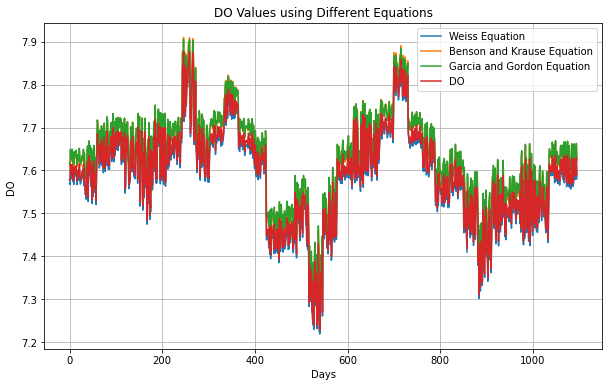

In [79]:
plt.figure(figsize=(10, 6))

plt.plot(DOWeiss, label="Weiss Equation")
plt.plot(DOBen, label="Benson and Krause Equation")
plt.plot(DOGar, label="Garcia and Gordon Equation")
#plt.plot(DO, label="DO")
plt.plot(DOorg, label="DO")


plt.xlabel("Days")
plt.ylabel("DO ")
plt.title("DO Values using Different Equations") # at T = {}°C".format(Tc))
plt.legend()
plt.grid(True)

plt.show()

In [80]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate errors
mae_weiss = mean_absolute_error(DOorg, DOWeiss)
mse_weiss = mean_squared_error(DOorg, DOWeiss)
rmse_weiss = np.sqrt(mse_weiss)
mape_weiss = np.mean(np.abs((DOorg - DOWeiss) / DOorg)) * 100

mae_ben = mean_absolute_error(DOorg, DOBen)
mse_ben = mean_squared_error(DOorg, DOBen)
rmse_ben = np.sqrt(mse_ben)
mape_ben = np.mean(np.abs((DOorg - DOBen) / DOorg)) * 100

mae_gar = mean_absolute_error(DOorg, DOGar)
mse_gar = mean_squared_error(DOorg, DOGar)
rmse_gar = np.sqrt(mse_gar)
mape_gar = np.mean(np.abs((DOorg - DOGar) / DOorg)) * 100

# Print the errors
print("Weiss Equation:")
print("MAE:", mae_weiss)
print("MSE:", mse_weiss)
print("RMSE:", rmse_weiss)
print("MAPE:", mape_weiss)

print("\nBenson and Krause Equation:")
print("MAE:", mae_ben)
print("MSE:", mse_ben)
print("RMSE:", rmse_ben)
print("MAPE:", mape_ben)

print("\nGarcia and Gordon Equation:")
print("MAE:", mae_gar)
print("MSE:", mse_gar)
print("RMSE:", rmse_gar)
print("MAPE:", mape_gar)


Weiss Equation:
MAE: 0.009220892586120343
MSE: 8.52134097634205e-05
RMSE: 0.009231110971243954
MAPE: 0.12145376063358863

Benson and Krause Equation:
MAE: 0.032105179555315645
MSE: 0.00103096717184039
RMSE: 0.03210867751621655
MAPE: 0.4227842827720978

Garcia and Gordon Equation:
MAE: 0.03645741917900296
MSE: 0.001346451482808094
RMSE: 0.03669402516497875
MAPE: 0.48089981246184094


In [81]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Select the specific range of indices
start_index = 899
end_index = 1096

# Calculate errors for the selected range
mae_weiss = mean_absolute_error(DOorg[start_index:end_index], DOWeiss[start_index:end_index])
mse_weiss = mean_squared_error(DOorg[start_index:end_index], DOWeiss[start_index:end_index])
rmse_weiss = np.sqrt(mse_weiss)
mape_weiss = np.mean(np.abs((DOorg[start_index:end_index] - DOWeiss[start_index:end_index]) / DOorg[start_index:end_index])) * 100

mae_ben = mean_absolute_error(DOorg[start_index:end_index], DOBen[start_index:end_index])
mse_ben = mean_squared_error(DOorg[start_index:end_index], DOBen[start_index:end_index])
rmse_ben = np.sqrt(mse_ben)
mape_ben = np.mean(np.abs((DOorg[start_index:end_index] - DOBen[start_index:end_index]) / DOorg[start_index:end_index])) * 100

mae_gar = mean_absolute_error(DOorg[start_index:end_index], DOGar[start_index:end_index])
mse_gar = mean_squared_error(DOorg[start_index:end_index], DOGar[start_index:end_index])
rmse_gar = np.sqrt(mse_gar)
mape_gar = np.mean(np.abs((DOorg[start_index:end_index] - DOGar[start_index:end_index]) / DOorg[start_index:end_index])) * 100

# Print the errors
print("Weiss Equation:")
print("MAE:", mae_weiss)
print("MSE:", mse_weiss)
print("RMSE:", rmse_weiss)
print("MAPE:", mape_weiss)
print()

print("Benson and Krause Equation:")
print("MAE:", mae_ben)
print("MSE:", mse_ben)
print("RMSE:", rmse_ben)
print("MAPE:", mape_ben)
print()

print("Garcia and Gordon Equation:")
print("MAE:", mae_gar)
print("MSE:", mse_gar)
print("RMSE:", rmse_gar)
print("MAPE:", mape_gar)
print()


Weiss Equation:
MAE: 0.009289856294645137
MSE: 8.64755379218868e-05
RMSE: 0.009299222436412994
MAPE: 0.12323722842665298

Benson and Krause Equation:
MAE: 0.0319586948483176
MSE: 0.0010215424458259901
RMSE: 0.031961577649202336
MAPE: 0.42392496046775757

Garcia and Gordon Equation:
MAE: 0.03800273190405722
MSE: 0.0014530745501077095
RMSE: 0.03811921497234314
MAPE: 0.5044079427594197



In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate errors
mae_weiss = mean_absolute_error(DOorg, DOWeiss)
mse_weiss = mean_squared_error(DOorg, DOWeiss)
rmse_weiss = np.sqrt(mse_weiss)
mape_weiss = np.mean(np.abs((DOorg - DOWeiss) / DOorg)) * 100

mae_ben = mean_absolute_error(DOorg, DOBen)
mse_ben = mean_squared_error(DOorg, DOBen)
rmse_ben = np.sqrt(mse_ben)
mape_ben = np.mean(np.abs((DOorg - DOBen) / DOorg)) * 100

mae_gar = mean_absolute_error(DOorg, DOGar)
mse_gar = mean_squared_error(DOorg, DOGar)
rmse_gar = np.sqrt(mse_gar)
mape_gar = np.mean(np.abs((DOorg - DOGar) / DOorg)) * 100

# Print the errors
print("Weiss Equation:")
print("MAE:", mae_weiss)
print("MSE:", mse_weiss)
print("RMSE:", rmse_weiss)
print("MAPE:", mape_weiss)
print()

print("Benson and Krause Equation:")
print("MAE:", mae_ben)
print("MSE:", mse_ben)
print("RMSE:", rmse_ben)
print("MAPE:", mape_ben)
print()

print("Garcia and Gordon Equation:")
print("MAE:", mae_gar)
print("MSE:", mse_gar)
print("RMSE:", rmse_gar)
print("MAPE:", mape_gar)
print()

# Generate LaTeX table code
latex_table = f"""
\\documentclass{{article}}
\\usepackage{{booktabs}}

\\begin{{document}}

\\begin{{table}}[htbp]
\\centering
\\caption{{Error Metrics for DO Equations}}
\\begin{{tabular}}{{lcccc}}
\\toprule
Equation & MAE & MSE & RMSE & MAPE (\\%) \\\\
\\midrule
Weiss & {mae_weiss:.4f} & {mse_weiss:.4f} & {rmse_weiss:.4f} & {mape_weiss:.2f} \\\\
Benson and Krause & {mae_ben:.4f} & {mse_ben:.4f} & {rmse_ben:.4f} & {mape_ben:.2f} \\\\
Garcia and Gordon & {mae_gar:.4f} & {mse_gar:.4f} & {rmse_gar:.4f} & {mape_gar:.2f} \\\\
\\bottomrule
\\end{{tabular}}
\\end{{table}}

\\end{{document}}
"""

# Print the LaTeX table code
print("LaTeX Table Code:")
print(latex_table)

import io

# Create a file object to write the table to
with open("table.txt", "w") as f:

    # Write the LaTeX table code to the file
    f.write(latex_table)


Weiss Equation:
MAE: 0.009220892586120343
MSE: 8.52134097634205e-05
RMSE: 0.009231110971243954
MAPE: 0.12145376063358863

Benson and Krause Equation:
MAE: 0.032105179555315645
MSE: 0.00103096717184039
RMSE: 0.03210867751621655
MAPE: 0.4227842827720978

Garcia and Gordon Equation:
MAE: 0.03645741917900296
MSE: 0.001346451482808094
RMSE: 0.03669402516497875
MAPE: 0.48089981246184094

LaTeX Table Code:

\documentclass{article}
\usepackage{booktabs}

\begin{document}

\begin{table}[htbp]
\centering
\caption{Error Metrics for DO Equations}
\begin{tabular}{lcccc}
\toprule
Equation & MAE & MSE & RMSE & MAPE (\%) \\
\midrule
Weiss & 0.0092 & 0.0001 & 0.0092 & 0.12 \\
Benson and Krause & 0.0321 & 0.0010 & 0.0321 & 0.42 \\
Garcia and Gordon & 0.0365 & 0.0013 & 0.0367 & 0.48 \\
\bottomrule
\end{tabular}
\end{table}

\end{document}

